## Superstore Sales Analysis :

"Superstore Sales" refers to the comprehensive sales data and performance metrics of a large retail store offering diverse products. Analyzing this data helps store owners and managers understand performance, customer segments, optimize inventory, and identify trends for data-driven decision-making. Key aspects include performance evaluation, customer segmentation, inventory management, and seasonal trend identification.



### Importing Required Libraries :

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math
import folium
from geopy.geocoders import Nominatim

## Understanding Data and Business :
Business understanding is a critical step in analysis process as it lays the foundation for a successful data-driven strategy. This step is taken up with the stakeholder such as business or charter owners who will be taking decisions based on the data. This helps us understand what data is available with us and how can this be used and correlated with each other. A clear understanding of data and need of analysis helps us to limit the scope of limit to particular area of business instead of digging all the businesses in domain. We can also ask for any additional data requirements or scope clarification at this step.

A small process that I usually follow before working on any dataset is as -
1. Understand and define the ask. Clearly define the objectives and requirements of the analysis i.e., note the variables to be used. 
2. Understand why to perform the analysis, who will consume the data and what insights are they or you willing to gain.
3. Choose the appropriate statistical technique and how will the data be presented to the stakeholders.

This helps in avoiding the analysis that only gives information and hence time is spent on building focused, meaning and actionalable data story.

In [24]:
# Reading Data From Csv File.

rawdatav1 = pd.read_csv("/kaggle/input/superstore-sales/superstore_final_dataset (1).csv",encoding='latin-1')
rawdatav1.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


### Understanding Variable Types, Data Types and Components of Raw Data.
Understanding variable types, data types, and components of raw data is again important for effective data analysis. Variable types can be categorical (e.g., segments, regions) or numerical (e.g., sales, postal codes), while data types encompass integers, strings, dates, and floats. Raw data typically comprises columns representing specific attributes (e.g., customer ID, product name) and rows representing individual data points.

A Peak into available columns, Number of Rows and data type of rows.

In [26]:
print('\n')

column_names = rawdatav1.columns
print("Column Names:", column_names)

print('\n')

rawdatav1.info()

print('\n')

print(f'The data set contains {rawdatav1.shape[1]} columns and {rawdatav1.shape[0]} rows')

print('\n')

for column in rawdatav1.columns:
    data_type = type(column)
    print(f"{column} >> {data_type}")
    



Column Names: Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 no

In [27]:
#Checking for unique values in a column, If the quantum is small what are those unique values.
rawdatav1.nunique()

Row_ID           9800
Order_ID         4922
Order_Date       1230
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              529
State              49
Postal_Code       626
Region              4
Product_ID       1861
Category            3
Sub_Category       17
Product_Name     1849
Sales            5757
dtype: int64

In [28]:
print(rawdatav1['Ship_Mode'].unique())
print('\n')
print(rawdatav1['Segment'].unique())
print('\n')
print(rawdatav1['Region'].unique())
print('\n')
print(rawdatav1['Category'].unique())
print('\n')
print(rawdatav1['Sub_Category'].unique())
print('\n')

['Second Class' 'Standard Class' 'First Class' 'Same Day']


['Consumer' 'Corporate' 'Home Office']


['South' 'West' 'Central' 'East']


['Furniture' 'Office Supplies' 'Technology']


['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']




## Data Preprocessing & Cleaning
Data preprocessing and cleaning are crucial steps in preparing raw data for analysis. It involves handling missing values, removing duplicates, transforming data types, and dealing with outliers. By ensuring data integrity and consistency, preprocessing enhances the quality and reliability of the data, leading to more accurate and meaningful analysis results. In our coming projects as we move towards machine learning and prediction models we will be giving much more time on this step.

As we notice in the data info() above that postal code has some null values, Let's check the quantum of such data and clear if required.

In [29]:
rawdatav1.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

Since the quantum of rows will null values (in Postal_Code) is very less, we will remove the rows. There can be Datasets where rows with some crucial values cannot be removed and hence we consider replacing the values with some measure of central tendency such as mean, median or mode.

In [30]:
print(f"Rows Before Removing Null values - {rawdatav1.shape[0]}")
rawdatav1 = rawdatav1.dropna(subset=['Postal_Code'])
print(f"Rows After Removing Null values - {rawdatav1.shape[0]}")

Rows Before Removing Null values - 9800
Rows After Removing Null values - 9789


### Converting columns to the appropriate data type
This is essential to ensure that data is represented accurately and efficiently. It involves converting numerical values to numeric data types, dates to datetime objects, and categorical variables to categorical data types. This step improves data integrity and allows for proper analysis and visualization of the data.

In [44]:
rawdatav1['Order_Date'] = pd.to_datetime(rawdatav1['Order_Date'], errors='coerce')
rawdatav1['Ship_Date'] = pd.to_datetime(rawdatav1['Ship_Date'], errors='coerce')
rawdatav1['Postal_Code'] = pd.to_numeric(rawdatav1['Postal_Code'], errors='coerce').astype('Int64')
rawdatav1['Sales'] = pd.to_numeric(rawdatav1['Sales'], errors='coerce')

rawdatav1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9789 non-null   int64         
 1   Order_ID       9789 non-null   object        
 2   Order_Date     9789 non-null   datetime64[ns]
 3   Ship_Date      9789 non-null   datetime64[ns]
 4   Ship_Mode      9789 non-null   object        
 5   Customer_ID    9789 non-null   object        
 6   Customer_Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal_Code    9789 non-null   Int64         
 12  Region         9789 non-null   object        
 13  Product_ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub_Category   9789 n

## Data Analysis & Visualization
Data Analysis & Visualization is helps in understanding and extracting insights from the dataset. It involves exploring the data to identify patterns, trends, and relationships, followed by creating visualizations to present the findings effectively.

In order to derive meaningful insights, it is essential to align the analysis with the scope and specific questions posed during the initial phase of understanding the business context. By focusing on relevant areas and formulating targeted questions, the analysis can provide valuable information to guide decision-making and form actionable strategies for the identified areas of interest.

In the context of the Superstore Sales dataset, data analysis and visualization can help store owners and managers understand the performance of the superstore across different regions, product categories, and customer segments. By aggregating sales data and plotting graphs, they can gain insights into the top-selling products, peak sales months, and customer preferences. This information can aid in optimizing inventory, identifying areas for improvement, and making data-driven decisions to enhance overall business performance.


### Copying Table
Before we dive deep into analysis and data manipulation. I prefer to use a copy of the orignal dataset as any unwanted changes to the dataset can be reverted back easily, this ensures data integrity and preventing potential data loss. This practice serves as a safeguard and allows me to do more confident and risk-free exploration of the dataset.

In [32]:
rawdatav2 = rawdatav1.copy()

rawdatav2.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


### Time Series Analysis Of Sales Revenue
This involves examining the trends and patterns in sales data over time on a yearly and monthly basis. It helps in understanding the seasonality, cyclic patterns, and overall performance of sales.

In the given dataset, we observe a positive trend in business performance over the four years. If data related to incurred costs is given, we can determine the net profitability of the company. 
This information can help us understand the overall company performance, setting goals, and formulating effective strategies for the upcoming years.

   Year     Sales  YoY_Del
0  2015  479856.0      NaN
1  2016  454316.0     -5.0
2  2017  597225.0     31.0
3  2018  721210.0     21.0






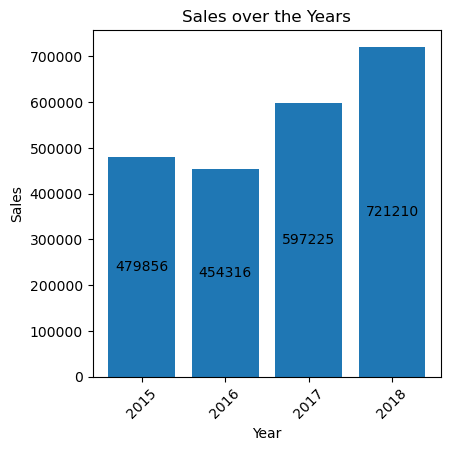

In [33]:
rawdatav2['Year'] = rawdatav2['Order_Date'].dt.year
rawdatav2['Month'] = rawdatav2['Order_Date'].dt.month


yearly_sales = rawdatav2.groupby("Year", as_index=False)['Sales'].sum()

yearly_sales['YoY_Del'] = yearly_sales['Sales'].pct_change()*100

print(yearly_sales.round(0))

print('\n')

print('\n')

plt.figure(figsize=(4.5, 4.5))
bars = plt.bar(yearly_sales['Year'],yearly_sales['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales over the Years')
plt.xticks(yearly_sales['Year'], rotation=45)
plt.bar_label(bars,label_type='center')    
plt.show()

The year-to-month analysis here helps us understand the recurring patterns in product sales and revenue contribution of the particular month as compared the year. This information is valuable for effective purchase planning and inventory management to meet customer demands. 
Notably, November shows high demand, highlighting the need for strategic planning during that month. Additionally, the consistent sales revenue across months as comapred to earlier years indicates the business's growing reach and increased customer footfall. This analysis provides valuable insights for making data-driven decisions to improve overall business performance.



Year   2015  2016  2017  2018
Month                        
1       6.0   6.0   6.0   8.0
2       3.0   5.0   8.0   7.0
3      11.0   8.0   8.0  10.0
4       5.0   8.0   7.0   5.0
5       6.0   7.0  11.0   6.0
6       6.0   6.0   6.0   7.0
7       7.0   6.0   7.0   7.0
8       8.0  10.0   8.0  10.0
9      14.0  14.0   7.0  10.0
10      7.0   7.0   9.0   9.0
11     13.0  11.0  11.0  12.0
12     13.0  12.0  12.0   8.0




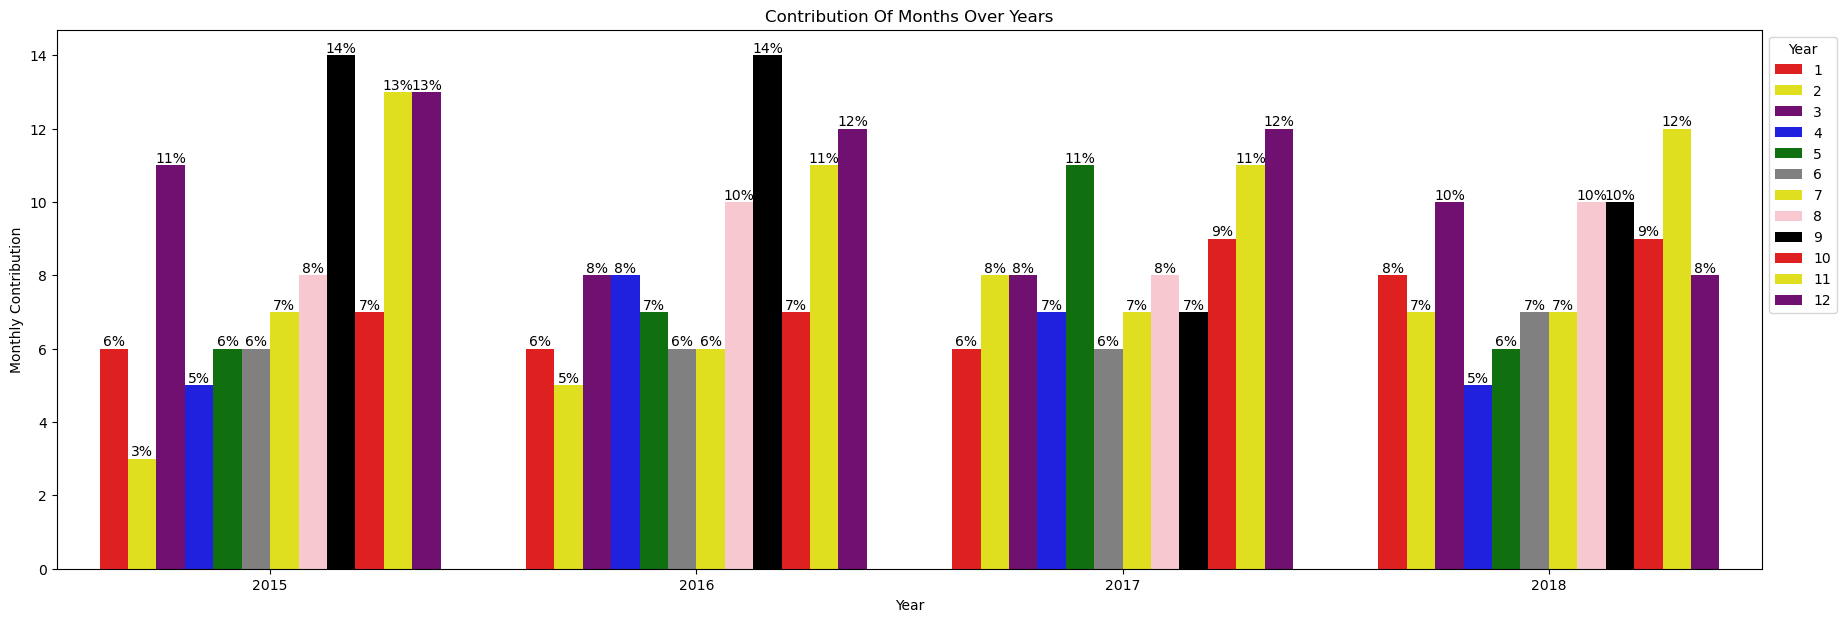

In [34]:
salesovertime = rawdatav2.groupby(['Year','Month'],as_index = False)['Sales'].sum().round(0)
yearlysales = rawdatav2.groupby(['Year'],as_index = False)['Sales'].sum().round(0)
salesovertime = salesovertime.merge(yearlysales,on='Year').round(0)
salesovertime.rename(columns={'Sales_x': 'monthly', 'Sales_y': 'yearly'}, inplace=True)
salesovertime['month_by_yearoverall']=((salesovertime['monthly']/salesovertime['yearly'])*100).round(0)
# print(salesovertime)

# ---------------------------------------
print('\n')
# ---------------------------------------

pivot_cyclicsales = salesovertime.pivot(index='Month',columns='Year',values='month_by_yearoverall')
pivot_cyclicsales = pivot_cyclicsales.round(0)
print(pivot_cyclicsales)

# ---------------------------------------
print('\n')
# ---------------------------------------

color_pla = ['red','yellow','purple','blue','green','grey','yellow','pink','black']

plt.figure(figsize=(22, 7))
ax = sns.barplot(x='Year', y='month_by_yearoverall', hue='Month', data=salesovertime, palette=color_pla)

for element in ax.patches:
    height = element.get_height()
    ax.annotate(f'{height:.0f}%', (element.get_x() + element.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Monthly Contribution')
plt.title('Contribution Of Months Over Years')
plt.legend(title='Year',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Distribution Of Order Prices.
We first analyze the distribution of sales per order across the four years to determine the average order value. The histogram reveals a Log Normal Distribution, indicating a right-skewed distribution with a long tail. To gain better insights into the average order sales, we apply natural log to each order's sales and present the transformed data in the form of a normal bell curve and a box plot. The box plot displays the median sales amount, outliers and the range of sales values. To obtain the exact sales values, we can perform reverse operation i.e., expoential function. This analysis helps us understand the average sales price, enabling us to create attractive marketing and discount offers for customers.

A similar view is created on overall monthly levels. This will help us understand if there is any month where additional demand of any certian product can increase or decrase the median sales value.

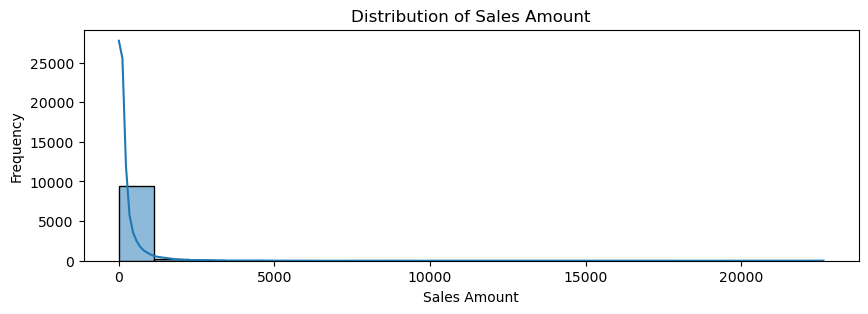

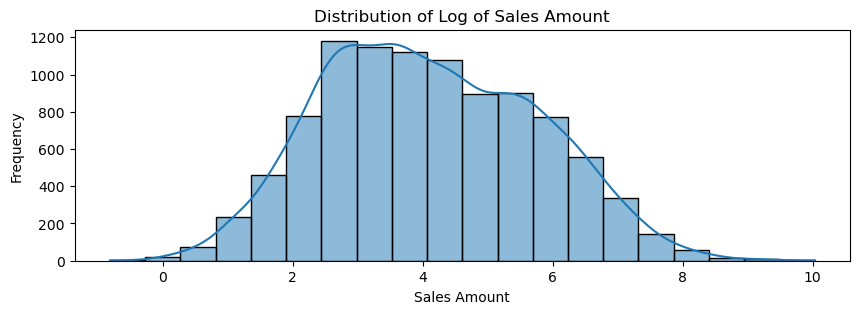

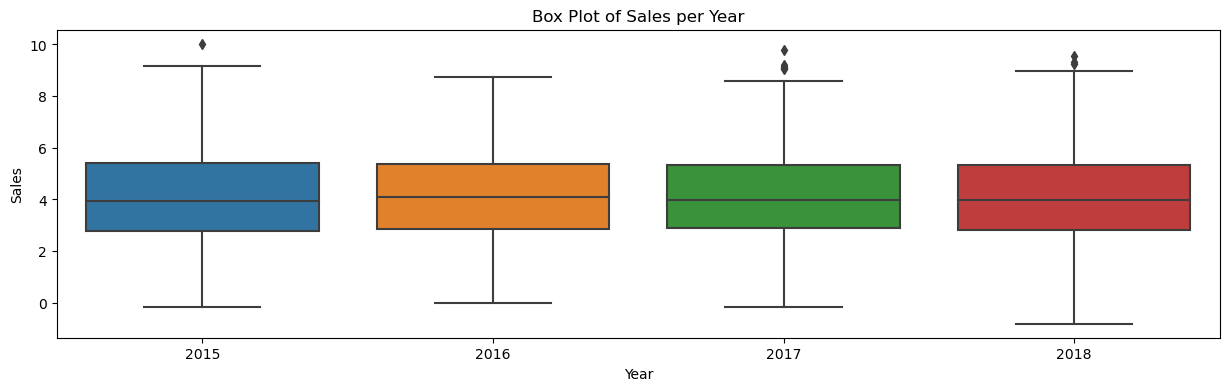

count    9789.000000
mean        4.110065
std         1.644797
min        -0.811931
25%         2.847696
50%         3.996070
75%         5.348972
max        10.027406
Name: Logofsales, dtype: float64

In [46]:

# # filtered_data = rawdatav2(rawdatav2['Year']=='2018')

salescleanedtable = rawdatav2

# To check frequency
# countcheck = salescleanedtable.groupby(['Sales'])['Row_ID'].count()
# print(countcheck)

plt.figure(figsize=(10, 3))
sns.histplot(salescleanedtable['Sales'], kde=True, bins=20)

plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Amount')
plt.show()


salescleanedtable['Logofsales'] = np.log(salescleanedtable['Sales'])

# salescleanedtable.head(5)

plt.figure(figsize=(10, 3))
sns.histplot(salescleanedtable['Logofsales'], kde=True, bins=20)

plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Log of Sales Amount')
plt.show()

# ---------------------------------------
print('\n')
# ---------------------------------------

plt.figure(figsize=(15, 4))
sns.boxplot(x='Year',y='Logofsales',data=salescleanedtable)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Box Plot of Sales per Year')
plt.show()

salescleanedtable['Logofsales'].describe()

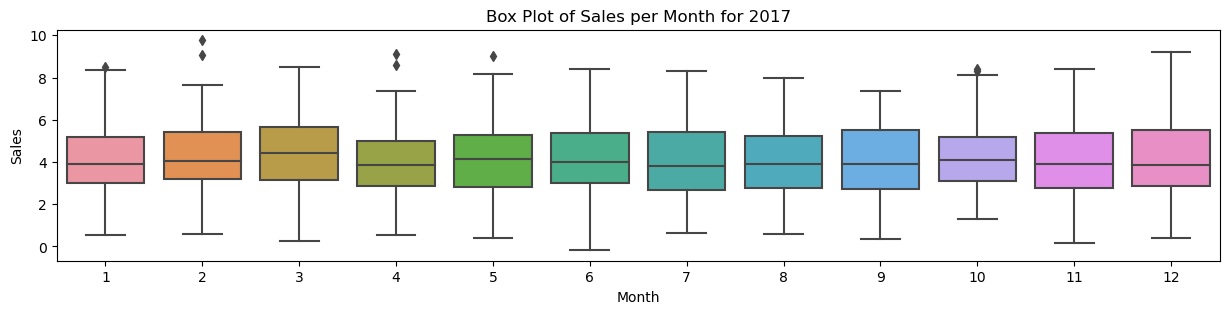

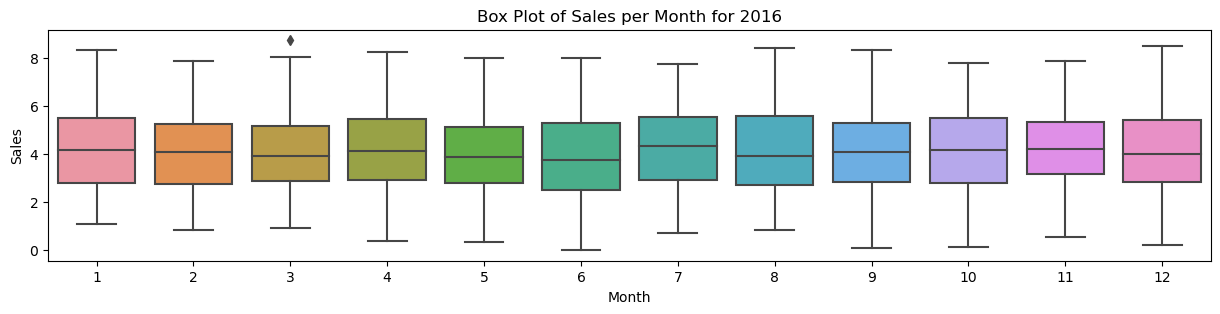

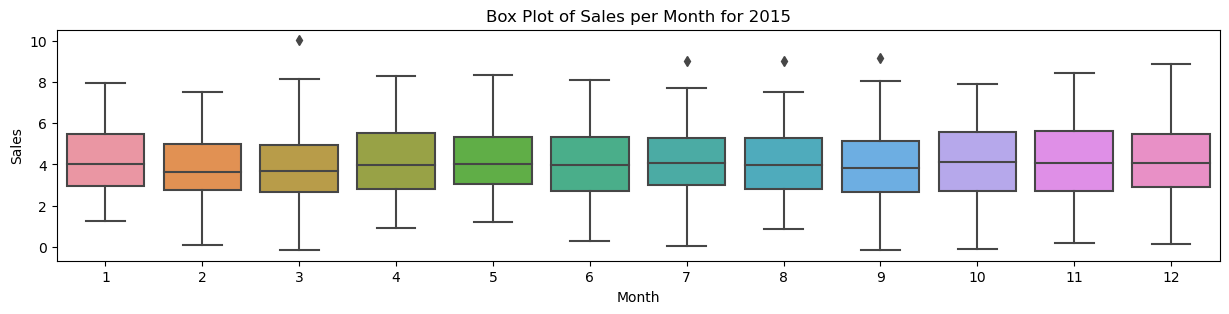

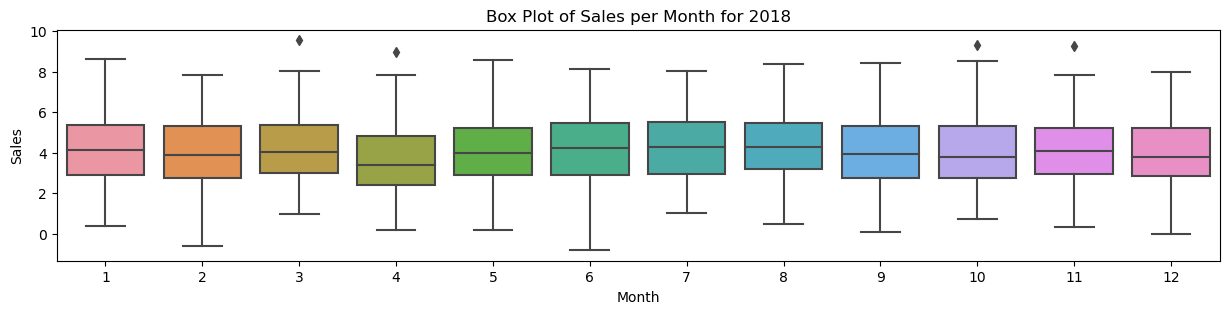

In [36]:
years = salescleanedtable['Year'].unique()

grouped_data = salescleanedtable.groupby('Year')

for year in years:
    plt.figure(figsize=(15, 3))
    filtereddataonyear = grouped_data.get_group(year)
    sns.boxplot(x='Month',y='Logofsales',data=filtereddataonyear)
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Box Plot of Sales per Month for {year}')

plt.show()

### Revenue Contribution Over The Years By Category
The following analysis and pie charts offer insights into the revenue contribution of different categories over the years, enabling us to observe trends and changes in category performance/contribution. The noticeable decline in revenue contribution from the furniture category can help teams to plan for the coming years towards product placement and allocation of resources and funds for the products in furniture category 

           Category  Year   Sales_x  Order_Cont
0         Furniture  2015  156477.9        32.6
1   Office Supplies  2015  149512.8        31.2
2        Technology  2015  173865.5        36.2
3         Furniture  2016  158933.8        35.0
4   Office Supplies  2016  133124.4        29.3
5        Technology  2016  162257.7        35.7
6         Furniture  2017  195813.0        32.8
7   Office Supplies  2017  180845.2        30.3
8        Technology  2017  220567.2        36.9
9         Furniture  2018  212313.8        29.4
10  Office Supplies  2018  239730.4        33.2
11       Technology  2018  269165.7        37.3




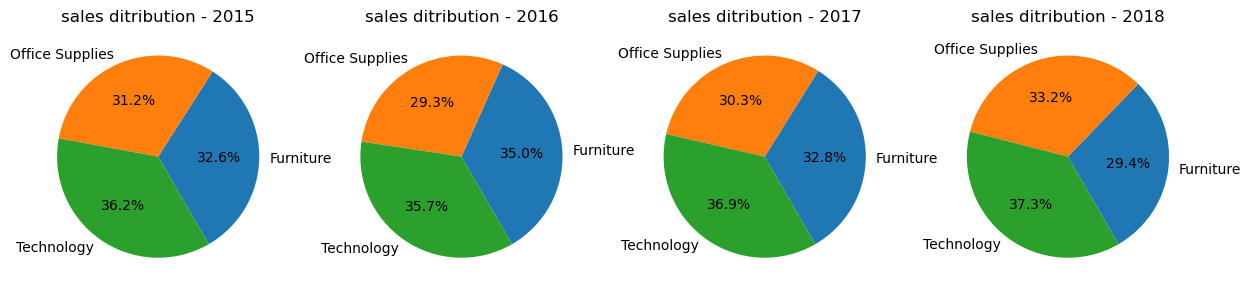

In [37]:
Salesbyproduct = rawdatav2.groupby(['Category','Year'],as_index=False)['Sales'].sum()

Salesbyyear = rawdatav2.groupby(['Year'],as_index=False)['Sales'].sum()

# Salesbyproduct = Salesbyproduct.sort_values('Category')

Salesbyproduct = Salesbyproduct.merge(Salesbyyear,on='Year') 

Salesbyproduct['Order_Cont'] = Salesbyproduct['Sales_x']/Salesbyproduct['Sales_y']*100

Salesbyproduct.drop('Sales_y',axis=1,inplace=True)

print(Salesbyproduct.round(1))

# ---------------------------------------
print('\n')
# ---------------------------------------


years = Salesbyproduct['Year'].unique()
num_years = len(years)

fig, axes = plt.subplots(1,num_years, figsize=(15,12))

for i,year in enumerate(years):
    filtered_data = Salesbyproduct[Salesbyproduct['Year']==year]

    axes[i].pie(filtered_data['Sales_x'],labels=filtered_data['Category'],autopct='%1.1f%%',startangle=-60)
    axes[i].set_title(f'sales ditribution - {year}')

# plt.suptitle('Side-by-Side Pie Charts of Sales Distribution by Year', fontsize=16)
plt.show()
    
# # Pie Chart Vertically

# for year in years:
#     filtered_data = Salesbyproduct[Salesbyproduct['Year']==year]
    
#     plt.figure(figsize=(3, 3))
#     plt.pie(filtered_data['Sales_x'],labels=filtered_data['Category'],autopct='%1.1f%%',startangle=-60)
#     plt.title(f'Sales Distribution - {year}')
#     plt.show()

### Revenue Contribution Over The Years By Region.
The provided analysis and bar charts shed light on the revenue contribution of different regions over the years, allowing us to assess our business performance across various geographies. 

The observed incremental growth in revenue contribution from the West region indicates positive progress, while some other regions show a declining trend compared to the previous year. Based on these findings, regional teams can devise action plans to capitalize on the growth opportunities in the West and implement strategies to improve sales in regions facing challenges.

To gain more comprehensive insights, further exploration can be conducted at the city and postal code levels. This granular analysis will provide a deeper understanding of the factors influencing sales performance and enable targeted strategies to optimize revenue and customer engagement in specific areas. Strategic planning at this level will aid in enhancing overall business success and addressing localized market dynamics effectively.  


     Region  Year  T_Sales_Region_Year  T_Sales_Year  T_Sales_Region  \
0   Central  2015             102921.0      479856.0        492647.0   
1   Central  2016             102425.0      454316.0        492647.0   
2   Central  2017             145674.0      597225.0        492647.0   
3   Central  2018             141627.0      721210.0        492647.0   
4      East  2015             127653.0      479856.0        660589.0   
5      East  2016             148105.0      454316.0        660589.0   
6      East  2017             175544.0      597225.0        660589.0   
7      East  2018             209287.0      721210.0        660589.0   
8     South  2015             103375.0      479856.0        389151.0   
9     South  2016              70076.0      454316.0        389151.0   
10    South  2017              93536.0      597225.0        389151.0   
11    South  2018             122165.0      721210.0        389151.0   
12     West  2015             145908.0      479856.0        7102

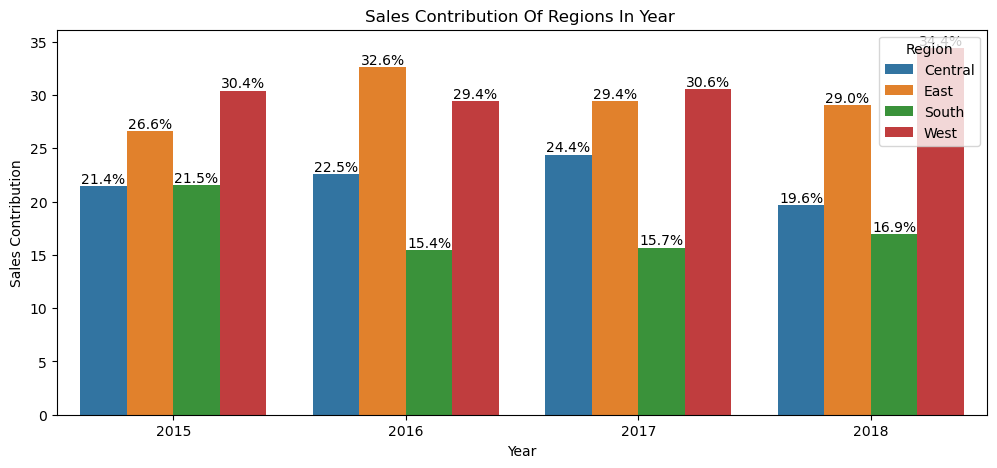



Region  Central  East  South  West
Year                              
2015       20.9  19.3   26.6  20.5
2016       20.8  22.4   18.0  18.8
2017       29.6  26.6   24.0  25.7
2018       28.7  31.7   31.4  34.9




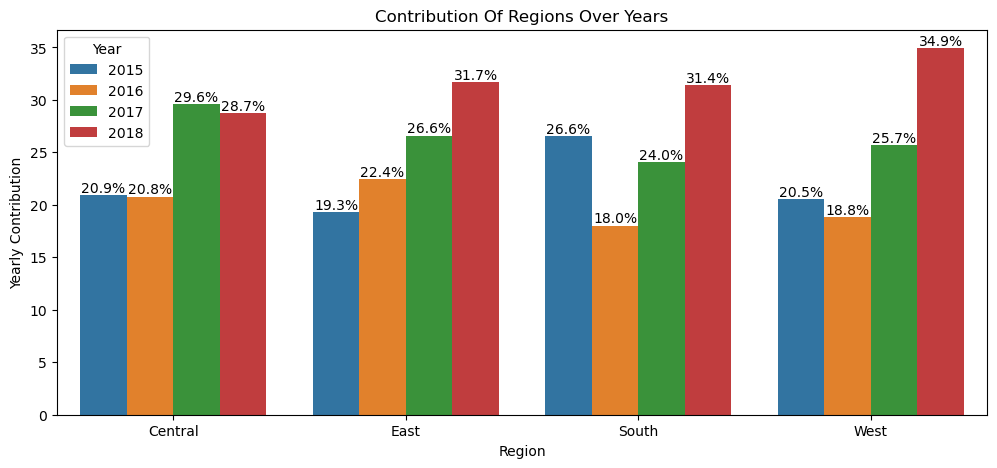

In [38]:
Salesbyregionandyear = rawdatav2.groupby(['Region','Year'],as_index=False)['Sales'].sum()

Salesbyyear = rawdatav2.groupby(['Year'],as_index=False)['Sales'].sum()
Salesbyregion = rawdatav2.groupby(['Region'],as_index=False)['Sales'].sum()

Salesbyregionandyear = Salesbyregionandyear.merge(Salesbyyear,on='Year').round(0)
Salesbyregionandyear = Salesbyregionandyear.merge(Salesbyregion,on='Region').round(0)

Salesbyregionandyear.rename(columns={'Sales_x': 'T_Sales_Region_Year', 'Sales_y': 'T_Sales_Year', 'Sales': 'T_Sales_Region'}, inplace=True)

Salesbyregionandyear['Cont_of_region_in_year'] = (Salesbyregionandyear['T_Sales_Region_Year']/Salesbyregionandyear['T_Sales_Year'])*100
Salesbyregionandyear['region_over_years'] = (Salesbyregionandyear['T_Sales_Region_Year']/Salesbyregionandyear['T_Sales_Region'])*100

print(Salesbyregionandyear.round(1))

# ---------------------------------------
print('\n')
# ---------------------------------------

pivot_regioninyear = Salesbyregionandyear.pivot(index='Region',columns='Year',values='Cont_of_region_in_year')
pivot_regioninyear = pivot_regioninyear.round(1)
print(pivot_regioninyear)

# ---------------------------------------
print('\n')
# ---------------------------------------

plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Year', y='Cont_of_region_in_year', hue='Region', data=Salesbyregionandyear)

for element in ax.patches:
    height = element.get_height()
    ax.annotate(f'{height:.1f}%', (element.get_x() + element.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Sales Contribution')
plt.title('Sales Contribution Of Regions In Year ')
plt.legend(title='Region')
plt.show()

# ---------------------------------------
print('\n')
# ---------------------------------------

pivot_regionoveryears = Salesbyregionandyear.pivot(index='Year',columns='Region',values='region_over_years')
pivot_regionoveryears = pivot_regionoveryears.round(1)
print(pivot_regionoveryears)

# ---------------------------------------
print('\n')
# ---------------------------------------

plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Region', y='region_over_years', hue='Year', data=Salesbyregionandyear)

for element in ax.patches:
    height = element.get_height()
    ax.annotate(f'{height:.1f}%', (element.get_x() + element.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('Region')
plt.ylabel('Yearly Contribution')
plt.title('Contribution Of Regions Over Years')
plt.legend(title='Year')
plt.show()

### Finding Most Selling products And Their Revenue Contribution Over The Last Four Years:
The presented sorted table provides a comprehensive overview of product performance over all four years. A similar view with year-over-year (YoY) and month-over-month (MoM) trends can be prepared for facilitating comparisons and then by analyzing this data, specific teams can make informed decisions, such as allocating more resources to high-performing products, optimizing product assortment, pricing strategies, or promotional efforts and then strategically deciding to removing less profitable or loss-making products from the shelves (Loss and margins data can be obtained only if cost data is given).

In [39]:
# rawdatav2.info()

mostsellingproductcount = rawdatav2.groupby(['Product_Name'],as_index=False)['Row_ID'].count()
mostsellingproductsum = rawdatav2.groupby(['Product_Name'],as_index=False)['Sales'].sum().round()

mostsellingproductcount.rename(columns={'Row_ID': 'Count'}, inplace=True)

mostsellingproductcount = mostsellingproductcount.sort_values('Count',ascending=False)
mostsellingproductsum = mostsellingproductsum.sort_values('Sales',ascending=False)

mostsellingproductcount.head(10)

,Product_Name,Count
1490,Staple envelope,47
1496,Staples,46
535,Easy-staple paper,44
257,Avery Non-Stick Binders,20
1493,Staple remover,18
1497,Staples in misc. colors,18
1508,Storex Dura Pro Binders,17
938,KI Adjustable-Height Table,17
1494,Staple-based wall hangings,16
989,Logitech 910-002974 M325 Wireless Mouse for We...,15


In [40]:
mostsellingproductsum.head(10)

,Product_Name,Sales
402,Canon imageCLASS 2200 Advanced Copier,61600.0
647,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.0
442,Cisco TelePresence System EX90 Videoconferenci...,22638.0
782,HON 5400 Series Task Chairs for Big and Tall,21871.0
683,GBC DocuBind TL300 Electric Binding System,19823.0
685,GBC Ibimaster 500 Manual ProClick Binding System,19024.0
801,Hewlett Packard LaserJet 3310 Copier,18840.0
783,HP Designjet T520 Inkjet Large Format Printer ...,18375.0
680,GBC DocuBind P400 Electric Binding System,17965.0
809,High Speed Automatic Electric Letter Opener,17030.0


### Finding Most Selling Sub-Categories And Their Revenue Contribution Over The Last Four Years:
The scatter plot shows category-wise sales performance over 4 years, highlighting top-performing categories. Using the clustered bar chart, we analyze sub-categories' revenue contibution trends over the last 4 years to strategize improvements as discused above but on sub-category level.

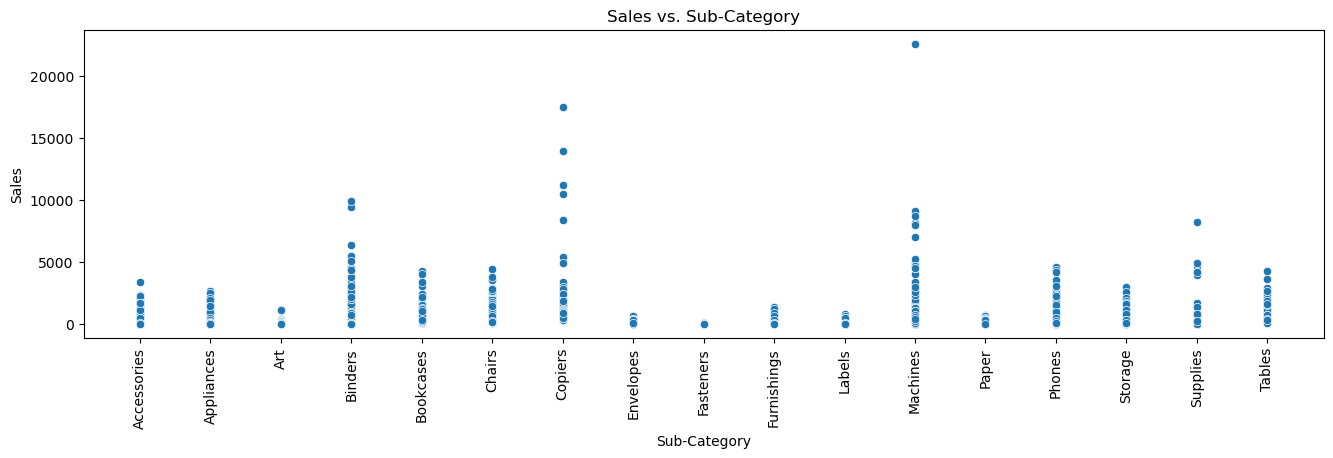

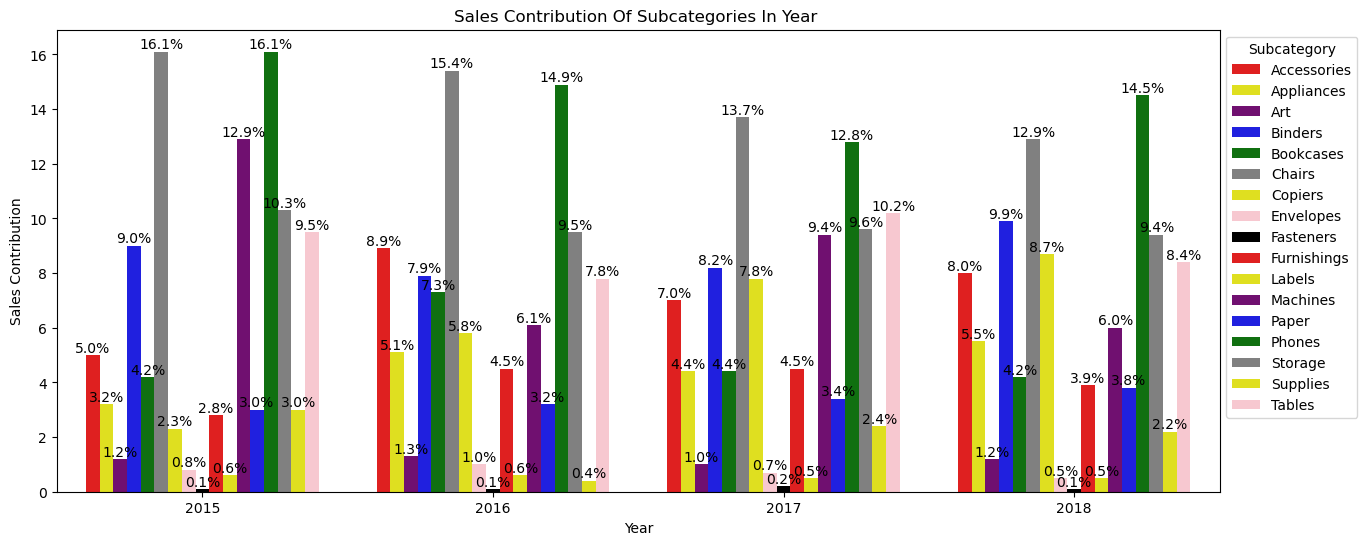

In [41]:
# rawdatav2.info()

rawdatav2['Sub_Category_Code'] = rawdatav2['Sub_Category'].astype('category').cat.codes

plt.figure(figsize=(16, 4))
sns.scatterplot(x='Sub_Category_Code', y='Sales', data=rawdatav2)
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales vs. Sub-Category')
plt.xticks(ticks=rawdatav2['Sub_Category_Code'].unique(), labels=rawdatav2['Sub_Category'].unique(), rotation=90)
plt.show()

# ---------------------------------------
print('\n')
# ---------------------------------------

yearlysales = rawdatav2.groupby(['Year'])['Sales'].sum().round(0)

mostsellingsubcatcount = rawdatav2.groupby(['Year','Sub_Category'])['Row_ID'].count()
mostsellingsubcatsum = rawdatav2.groupby(['Year','Sub_Category'])['Sales'].sum().round(0)

mostsellingsubcatcount = mostsellingsubcatcount.reset_index(name='Count')
mostsellingsubcatsum = mostsellingsubcatsum.reset_index(name='Sum')

mostsellingsubcat = mostsellingsubcatcount.merge(mostsellingsubcatsum,on=['Year','Sub_Category'])
mostsellingsubcat = mostsellingsubcat.merge(yearlysales,on=['Year'])

# mostsellingsubcat.rename(columns={'Sales':'Yearly_Sales'})

mostsellingsubcat['subcat_yearly_oc'] = ((mostsellingsubcat['Sum']/mostsellingsubcat['Sales'])*100).round(1)

# mostsellingsubcat
color_pla = ['red','yellow','purple','blue','green','grey','yellow','pink','black']

plt.figure(figsize=(15,6))
ax = sns.barplot(x='Year', y='subcat_yearly_oc', hue='Sub_Category', data=mostsellingsubcat,palette=color_pla)

for element in ax.patches:
    height = element.get_height()
    ax.annotate(f'{height:.1f}%', (element.get_x() + element.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Sales Contribution')
plt.title('Sales Contribution Of Subcategories In Year ')
plt.legend(title='Subcategory',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Customer Segment Vs Sub Category
This data provides valuable insights for in-store assortment of products. The heatmap helps us identify customer segment preferences for different sub-categories. By smartly placing related products together and offering complementary products, we can boost cross-selling and increase overall sales. Additionally, understanding fast-moving sub-categories by consumer segment can guide product placement to the store-end and hence buyer spending more time in the store.

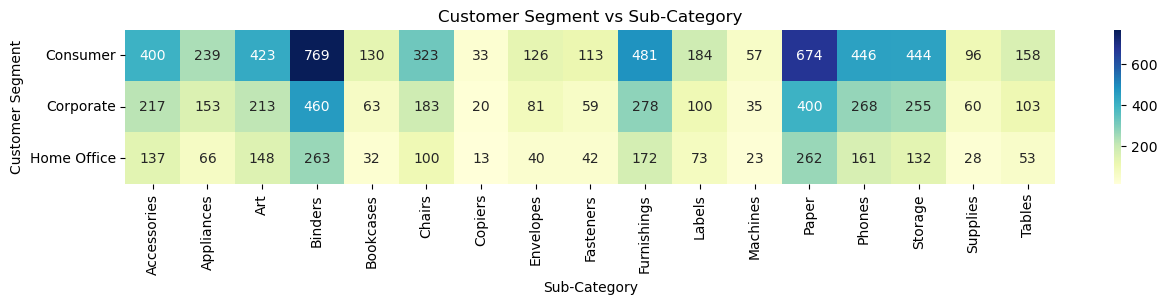

In [42]:
subcat_segment_pivot = rawdatav2.pivot_table(index='Segment', columns='Sub_Category', aggfunc='size', fill_value=0)

plt.figure(figsize=(15, 2))
sns.heatmap(subcat_segment_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Sub-Category')
plt.ylabel('Customer Segment')
plt.title('Customer Segment vs Sub-Category')
plt.show()

### Customer Segement Vs City and Customer Segement Vs Region 
Our analysis below is instrumented to guide our purchase plans and warehouse expansion strategy. The insightful heat maps reveal customer segments' distribution across cities and regions, allowing us to prepare targeted purchase plans for specific products. Additionally, by merging this data with information on popular sub-categories among different customer segments, we can identify key areas through postal codes (or city and region) where warehouses can be strategically located. These warehouses will cater to high-demand sub-categories and products, ensuring fast deliveries and enhanced customer service.

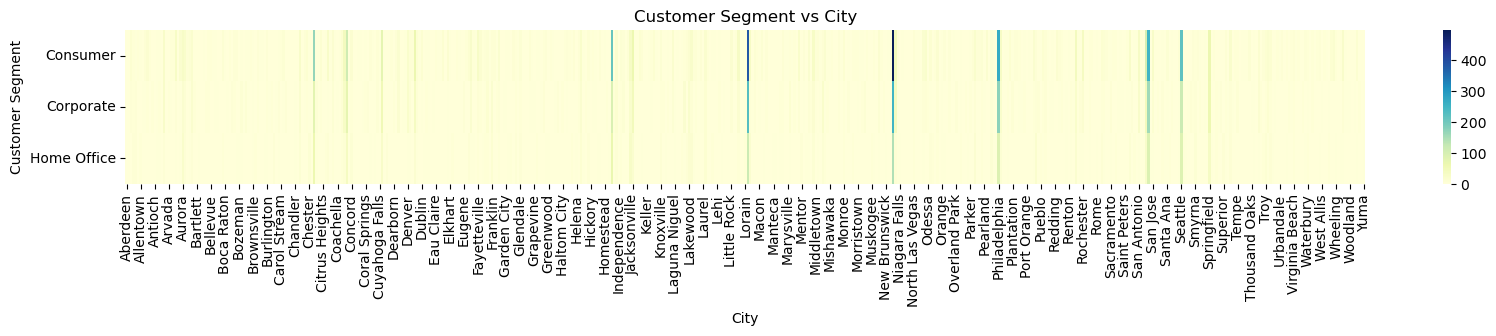

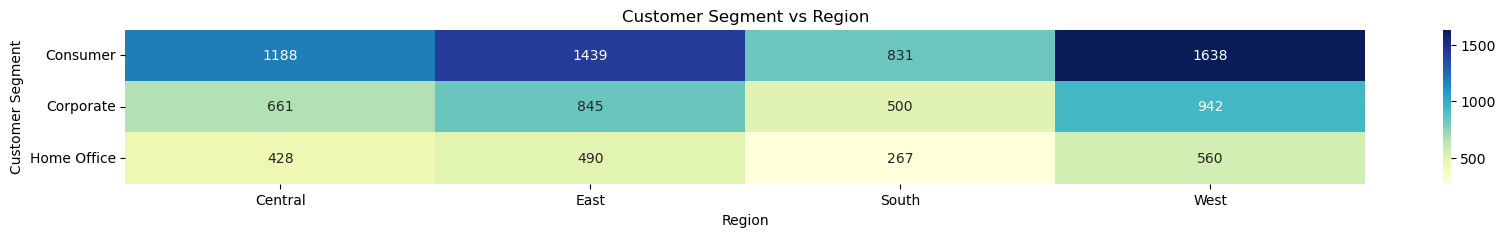

In [43]:
subcat_city_pivot = rawdatav2.pivot_table(index='Segment', columns='City', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 2))
sns.heatmap(subcat_city_pivot, fmt='d', cmap='YlGnBu')
plt.xlabel('City')
plt.ylabel('Customer Segment')
plt.title('Customer Segment vs City')
plt.show()

# ---------------------------------------
print('\n')
# ---------------------------------------

subcat_region_pivot = rawdatav2.pivot_table(index='Segment', columns='Region', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 2))
sns.heatmap(subcat_region_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Region')
plt.ylabel('Customer Segment')
plt.title('Customer Segment vs Region')
plt.show()

## Summary:

1st. Analysis Overview:
The analysis revolves around understanding and leveraging the sales data of a superstore to make informed business decisions. It includes exploring revenue & sales trends, regional performance, product category insights, customer segments, seasonal patterns, etc.

2nd. Statistical Techniques:
We have employed statistical techniques such as aggregation, distirbution, correlation and time-series analysis to identify relationships between variables.

3rd. Python Techniques:
Python libraries like pandas, seaborn, and matplotlib were used for data manipulation, visualization, and generating descriptive statistics. We also applied groupby operations to aggregate data and create insightful summaries.

4th. Learnings:
Through this analysis, we not only gained insights into the superstore's sales performance but also honed our data manipulation and visualization skills using Python. We became proficient in using pandas for data aggregation, seaborn for creating informative visualizations like heatmaps and box plots, and matplotlib for generating bar charts and scatter plots. Moreover, developed a better understanding of interpreting statistical measures and identifying trends within the dataset. This project has sharpened the analytical abilities to present data-driven insights more effectively.

5th. Further Possibilities:
To enhance the analysis, predictive modeling can be employed to forecast future sales. Customer segmentation analysis can be performed to target specific customer groups with tailored marketing strategies. Additionally, time series forecasting techniques can be used for demand forecasting to optimize inventory management.